In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the data
x = 57
n = 100


In [3]:
# Define the Likelihood P(x|p) - binomial distribution
def likelihood(p):
    return stats.binom.pmf(x, n, p)


In [4]:
# Define Prior Function - Uniform Distribution
def prior(p):
    return stats.uniform.pdf(p)


In [5]:
# Create function to compute acceptance ratio
# This function will accept the current and proposed values of p
def acceptance_ratio(p, p_new):
    # Return R, using the functions we created before
    return min(1, ((likelihood(p_new) / likelihood(p)) * (prior(p_new) / prior(p))))


In [6]:
# Create empty list to store samples
results = []

# Initialzie a value of p
p = np.random.uniform(0, 1)


In [7]:
# Define model parameters
n_samples = 25000
burn_in = 5000
lag = 5


In [8]:
# Create the MCMC loop
for i in range(n_samples):
    # Propose a new value of p randomly from a uniform distribution between 0 and 1
    p_new = np.random.random_sample()
    # Compute acceptance probability
    r = acceptance_ratio(p, p_new)
    # Draw random sample to compare R to
    u = np.random.random_sample()
    # If R is greater than u, accept the new value of p (set p = p_new)
    if u < r:
        p = p_new
    # Record values after burn in - how often determined by lag
    if i > burn_in and i%lag == 0:
        results.append(p)
plt.scatter(x,y)

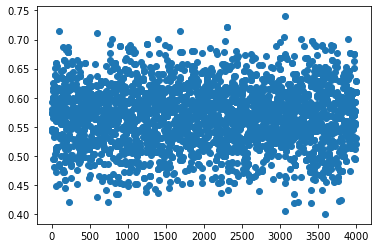

In [22]:

y=results
x=range(1,4000)
plt.scatter(x,y)